In [1]:
import seaborn as sns
import os
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

# Football Manager 2020 선수 데이터 

In [10]:
datapath = r'C:\DevRoot\dataset'
filename = 'datafm20.csv'

path = os.path.join(datapath, filename)
fm2020_df = pd.read_csv(path)
fm2020_df

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,...,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,...,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,...,14,4,1,16,14,18,13,6,2,15
2,2,Kylian MbappÃ©,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,...,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,...,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,...,17,3,1,14,14,16,18,10,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,144745,Yuan Jinxing,ST (C),Unknown,Unknown,China,CHN,169,81,41,...,7,3,3,2,3,9,8,8,1,11
144746,144746,Aizudin Abdul Rahman,M (C),BSRC,Bruneian Premier League,Brunei (Premier League),BRU,180,69,24,...,4,1,3,1,3,4,9,14,2,9
144747,144747,Berlin Jean-Gilles,ST (C),CS Monteuil,PremiÃ¨re Ligue de soccer du QuÃ©bec,Canada (PLSQ),HAI,180,79,32,...,8,3,1,1,2,4,10,6,3,11
144748,144748,Frederik van Hauen,M (C),Skovshoved,2. Division,Denmark (2. Division),DEN,195,85,19,...,3,3,3,3,4,4,3,16,1,5


In [13]:
# fm2020_df.columns

'''
'Name' : 선수 이름, 136041개의 unique values
'Position' : 가능한 모든 포지션
'Club' : 소속 팀
'Division' : 소속 팀의 리그
'Based' : Nation Based of player(기타국적) 실제 국적은 다르지만 부모의 국적이나 혹은 이중국적
'Nation' : 국적
'Height' : 신장(cm)
'Weight' : 몸무게(kg)
'Age' : 나이
'Preferred Foot' : 주발 (선호하는 다리)
'Best Pos' : Best position of player (가장 잘하는 자리)
'Best Role' : Best role of player in position (가장 잘하는 역할)
'Value' : 선수가치(EURO)
'Wage' : 주급(EURO)
'CA' : 현재 능력치(Current Ability of player) (인게임에서는 보이지 않음)
'PA' : 잠재 능력치(Potential Ability of player) (인게임에서는 보이지 않음)
'Wor' : 활동량(Work Rate) 선수가 최대 한계까지 노력하려는 정신적 추진력을 반영한다
'Vis' : 시야(Vision) 시야는 빈틈을 찾아내는 선수의 능력, 빈틈을 이용할 수 있는지와는 관계가 없음
'Thr' : 던지기(Throwing) 골키퍼 능력치, 손으로 공을 던질때 정확도
'Tec' : 개인기(Technique) 볼을 얼마나 정밀하게 다루는지 나타낸다
'Tea' : 팀워크(Teamwork) Player can follow tactical instructions whilst working for and alongside his team-mates
'Tck' : 태클(Tackling) Player's ability to win the ball cleanly without conceding foul in such situations
'Str' : 힘(Strength) Player;s ability to exert his physical force on an opponent to his benefit
'Sta' : 스테미너(Stamina) Player;s ability to endure high-level physical activity for extended periods of time
'TRO' : (Rushing Out (Tendency)) Goalkeeper's tendency to come off his line toreact to through ball and crosses
'Ref' : Reflexes; Goalkeeper's ability to react to unpredictable events with a high success rate
'Pun' : Punching; Goalkeeper's inclination to punch the ball clear in situations where he could perharps attempt to catch the ball
'Pos' : Positioning; Player's ability to read a defensive situation and position themselves accordingly
'Pen' : Penalty Taking; Player;s ability from the penalty spot
'Pas' : Passing; Player's ability to successfully find a team-mate with the ball
'Pac' : Pace; Player's top speed both on and off the ball
'1v1' : One on Ones; Goalkeeper's ability to do well when faced with an opponent in a one on one situtation
'OtB' : Off the Ball; Player's ability to move when not in possession of the ball, making themselves available to receive a pass in dangerous position
'Nat' : Natural Fitness; How well a player stays fit when injured or not in training
'Mar' : Marking; Player's ability to stick close to his direct opposition in defensive situations
'L Th' : Long Throws; Player's ability to throw the balllong, often in attacking situations
'Lon' : Long Shots; Player's prowess when shooting from outsine penalty area
'Ldr' : Leadership; Player's ability to influence player around them on the pitch
'Kic' : Kicking; The distance goalkeeper can reach with a kick both from his hands and on the ground
'Jum' : Jumping Reach; The highest point that a player can reach with his head
'Hea' : Heading; Player's ability to head the ball
'Han' : Handling; Goalkeeper's ability to hold onto the ball when making a save
'Fre' : Freekick Taking; Player's ability to strike a dead ball, either when having a shot or putting the ball into dangerous areas from deep or out wide
'Fla' : Flair; Player's natural talent for the creative and unpredictable
'Fir' : First Touch; Player's ability to control the ball immediately as it is passed into feet
'Fin' : Finishing; Player's ability to putt the ball in the back of the net when presented with a chance
'Ecc' : Eccentricity; Goalkeeper's tendency to do the unexpected with or without the ball
'Dri' : Dribbling; Player's ability to run with the ball and manipulate it under close control
'Det' : Determination; Player's commitment to succeed and do his very best on and off the pitch
'Dec' : Decision; Player's ability to make the correct choice both with and without the ball
'Cro' : Crossing; Player's ability to cross the ball accurately from wide areas
'Cor' : Corner; Player's ability to accurately take a corner
'Cnt' : Concentration; Player's mental focus and attention to detail on a event a event basis
'Cmp' : Composure; Player's steadiness of mind and ability to make intelligent decisions with and without the ball
'Com' : Communication; Goalkeeper's ability to communicate with his defensive line and organise the defensive side of the team
'Cmd' : Command of Area; Goalkeeper's ability to instinctively take charge of his penalty area by coming crosses and commanding his defensive line
'Bra' : Bravery; How committed player is, often putting themselves into risky situations which may cause injury
'Bal' : Balance; How well a player can stay on his feet, both on and off the ball
'Ant' : Anticipation; Player's ability to predict and react to events going on around them
'Agi' : Agility; How well player can start, stop and move in different directions at varying levels of speed both on and off the ball
'Agg' : Aggression; Player willingness to get stuck in, perharps at expense of giving away more fouls
'Aer' : Aerial Reach; Player's physical ability to challange in aerial situations
'Acc' : Acceleration; How quickly a player can get to top of speed from standing start
'''

None

Index(['Unnamed: 0', 'Name', 'Position', 'Club', 'Division', 'Based', 'Nation',
       'Height', 'Weight', 'Age', 'Preferred Foot', 'Best Pos', 'Best Role',
       'Value', 'Wage', 'CA', 'PA', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck',
       'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1',
       'OtB', 'Nat', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han',
       'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor',
       'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer',
       'Acc'],
      dtype='object')

In [12]:
fm2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144750 entries, 0 to 144749
Data columns (total 64 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      144750 non-null  int64 
 1   Name            144750 non-null  object
 2   Position        144750 non-null  object
 3   Club            144750 non-null  object
 4   Division        144750 non-null  object
 5   Based           144750 non-null  object
 6   Nation          144750 non-null  object
 7   Height          144750 non-null  int64 
 8   Weight          144750 non-null  int64 
 9   Age             144750 non-null  int64 
 10  Preferred Foot  144750 non-null  object
 11  Best Pos        144750 non-null  object
 12  Best Role       144750 non-null  object
 13  Value           144750 non-null  int64 
 14  Wage            144750 non-null  int64 
 15  CA              144750 non-null  int64 
 16  PA              144750 non-null  int64 
 17  Wor             144750 non-nu

In [19]:
fm2020_df.groupby('Nation').size().sort_values(ascending=False)[:10]

Nation
ARG    10254
BRA     7935
FRA     5546
ENG     5050
ESP     4763
POL     4220
ITA     3833
GRE     3452
GER     3327
CHN     2979
dtype: int64

(array([3., 2., 2., 1., 0., 0., 1., 0., 0., 1.]),
 array([ 2979. ,  3706.5,  4434. ,  5161.5,  5889. ,  6616.5,  7344. ,
         8071.5,  8799. ,  9526.5, 10254. ]),
 <BarContainer object of 10 artists>)

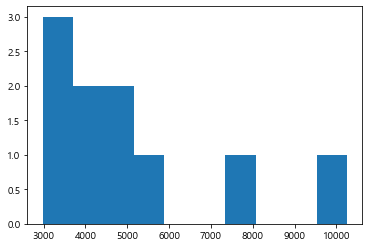